<a href="https://colab.research.google.com/github/tszabad/FCC_dataanalytics/blob/master/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

Getting data

In [86]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2021,1,25)
tesla = web.DataReader('TSLA', "yahoo", start, end)
msft = web.DataReader('MSFT', "yahoo", start, end)
google = web.DataReader('GOOGL', "yahoo", start, end)

Plotting the open stock prices

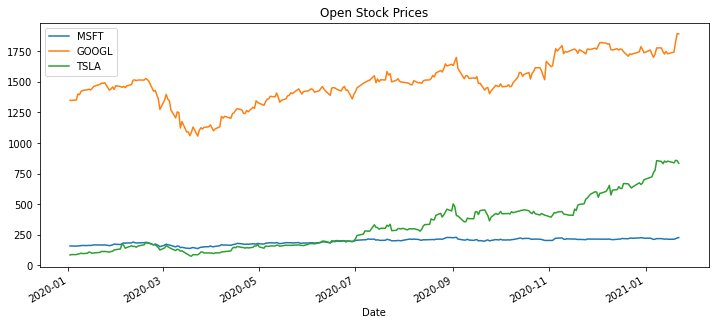

In [87]:
msft['Open'].plot(label = "MSFT", figsize = (12,5))
google['Open'].plot(label = "GOOGL")
tesla['Open'].plot(label = "TSLA")
plt.title("Open Stock Prices")
plt.legend()

Plotting volume

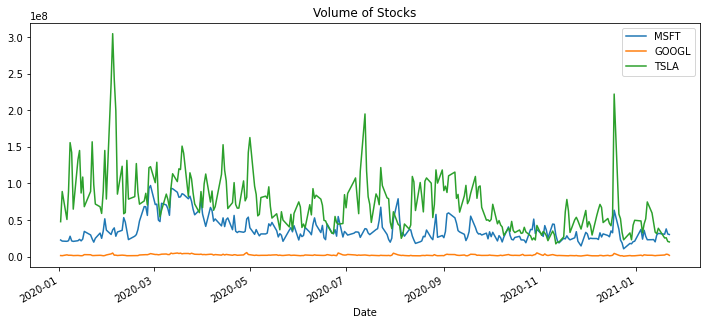

In [88]:
msft['Volume'].plot(label = "MSFT", figsize = (12,5))
google['Volume'].plot(label = "GOOGL")
tesla['Volume'].plot(label = "TSLA")
plt.title("Volume of Stocks")
plt.legend()

In [89]:
msft.iloc[[msft["Volume"].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-28,163.710007,152.0,152.410004,162.009995,97073600.0,160.749588


In [90]:
msft["Volume"].argmax()

39

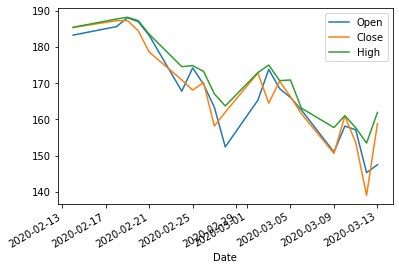

In [91]:
msft["Open"].iloc[30:50].plot()
msft["Close"].iloc[30:50].plot()
msft["High"].iloc[30:50].plot()
plt.legend()

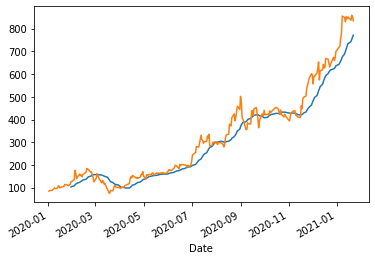

In [92]:
tesla["rollavg"] = tesla["Open"].rolling(20).mean()
tesla["rollavg"].plot()
tesla["Open"].plot()

In [93]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = msft["Open"]
train,test = X[1:len(X)-7],X[len(X)-7:]

In [94]:
train.shape

(259,)

In [95]:
model = AR(train)
model_fit= model.fit()
window = model_fit.k_ar 
coeff = model_fit.params


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [96]:
history = train[len(train) - window:]

In [97]:
history = [history[i] for i in range(len(history))]

In [98]:
predictions=[]
for t in test:
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    y = coeff[0]
    for d in range(window):       
        y += coeff[d + 1] * lag[window - d - 1]
        #print(coeff[d + 1] * lag[window - d - 1])
    predictions.append(y)
    history.append(t)

In [100]:
predictions1= pd.Series(predictions, index=test.index)

In [83]:
test

Date
2021-01-13 00:00:00                                               214.02
2021-01-14 00:00:00                                               215.91
2021-01-15 00:00:00                                               213.52
2021-01-19 00:00:00                                               213.75
2021-01-20 00:00:00                                                217.7
2021-01-21 00:00:00                                                224.7
2021-01-22 00:00:00                                               227.08
pred                   Date
2021-01-13    216.465189
2021-01-14    21...
Name: Open, dtype: object

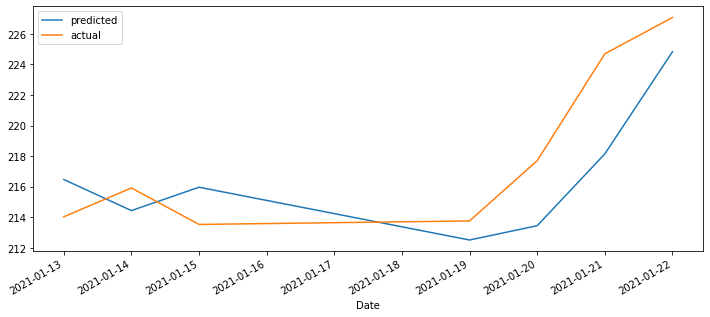

In [103]:
predictions1.plot(label='predicted', figsize = (12,5))
test.plot(label='actual')
plt.legend()
